In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import plotting

#plotly
import plotly.offline as py
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
init_notebook_mode(connected=True)
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix,classification_report,precision_score
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set(style="whitegrid")

In [32]:
df=pd.read_csv('https://raw.githubusercontent.com/gsdavis1959/Data/master/advertising.csv')
df.head()

# https://www.kaggle.com/code/jurk06/feature-importance/notebook


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [33]:
df["id"] = df.index + 1
df

,TV,Radio,Newspaper,Sales,id
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,2
2,17.2,45.9,69.3,12.0,3
3,151.5,41.3,58.5,16.5,4
4,180.8,10.8,58.4,17.9,5
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,196
196,94.2,4.9,8.1,14.0,197
197,177.0,9.3,6.4,14.8,198
198,283.6,42.0,66.2,25.5,199


from matplotlib import pyplot as plt
df['TV'].plot(kind='hist', bins=20, title='TV')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Radio'].plot(kind='hist', bins=20, title='Radio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Newspaper'].plot(kind='hist', bins=20, title='Newspaper')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='TV', y='Radio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Radio', y='Newspaper', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Newspaper', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Sales', y='id', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['TV']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('TV')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['Radio']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('Radio')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['Newspaper']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('Newspaper')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['id']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
df['TV'].plot(kind='line', figsize=(8, 4), title='TV')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Radio'].plot(kind='line', figsize=(8, 4), title='Radio')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Newspaper'].plot(kind='line', figsize=(8, 4), title='Newspaper')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

In [48]:
print(max(df['Sales']))

27.0


In [3]:
df=df.drop('Unnamed: 32', axis=1)

In [4]:
from scipy import stats

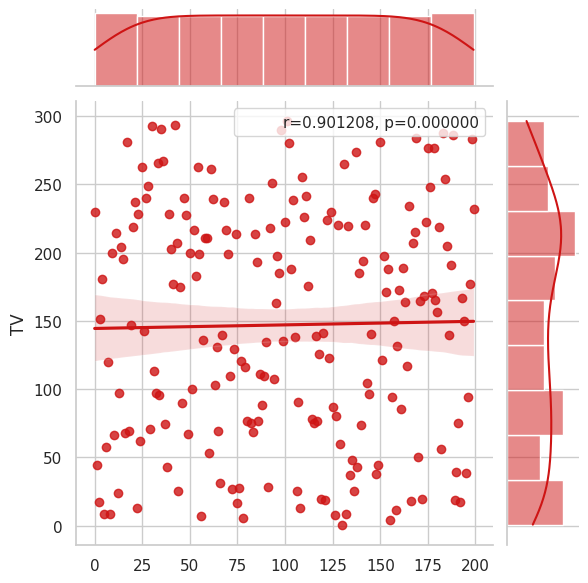

In [34]:
r, p=stats.pearsonr(df.loc[:,'TV'], df.loc[:,'Sales'])
graph=sns.jointplot(df.loc[:,'TV'], kind="reg", color="#ce1414",)
phantom, =graph.ax_joint.plot([],[], linestyle="", alpha=0)
graph.ax_joint.legend([phantom],['r={:f}, p={:f}'.format(r,p)])
plt.show()

In [7]:
diagnosis={'M':1, 'B':0}
df['diagnosis']=[diagnosis[x] for x in df['diagnosis']]

In [49]:
df['diagnosis'] = np.where(df['Sales'] > 10, 1, 0)
df

,TV,Radio,Newspaper,Sales,id,diagnosis
0,230.1,37.8,69.2,22.1,1,1
1,44.5,39.3,45.1,10.4,2,1
2,17.2,45.9,69.3,12.0,3,1
3,151.5,41.3,58.5,16.5,4,1
4,180.8,10.8,58.4,17.9,5,1
...,...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,196,0
196,94.2,4.9,8.1,14.0,197,1
197,177.0,9.3,6.4,14.8,198,1
198,283.6,42.0,66.2,25.5,199,1


In [67]:
df = df.drop(['Sales'], axis=1)

In [68]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [69]:
X.shape, y.shape

((200, 3), (200,))

In [70]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


Logistic Regression

In [53]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [71]:
X_train.shape, y_train.shape

((140, 3), (140,))

In [72]:
lr=LogisticRegression(solver="liblinear")
lr.fit(X, y)

LogisticRegression(solver='liblinear')

In [14]:
col=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [57]:
col=['TV', 'Newspaper', 'Radio']

Feature: 0, Score: 0.06227
Feature: 1, Score: 0.05410
Feature: 2, Score: -0.02355


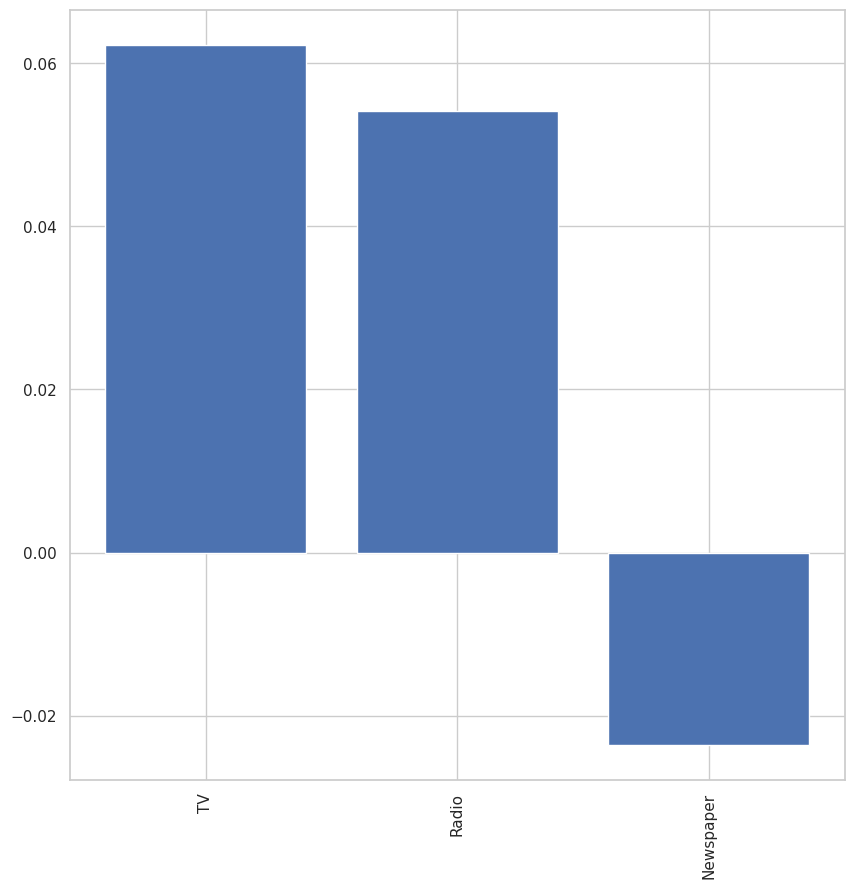

In [73]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)
plt.show()

Feature imporatnce after Standarization

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [75]:
lr=LogisticRegression(solver="liblinear")
lr.fit(X, y)

LogisticRegression(solver='liblinear')

Feature: 0, Score: 2.94562
Feature: 1, Score: 0.58270
Feature: 2, Score: -0.16480


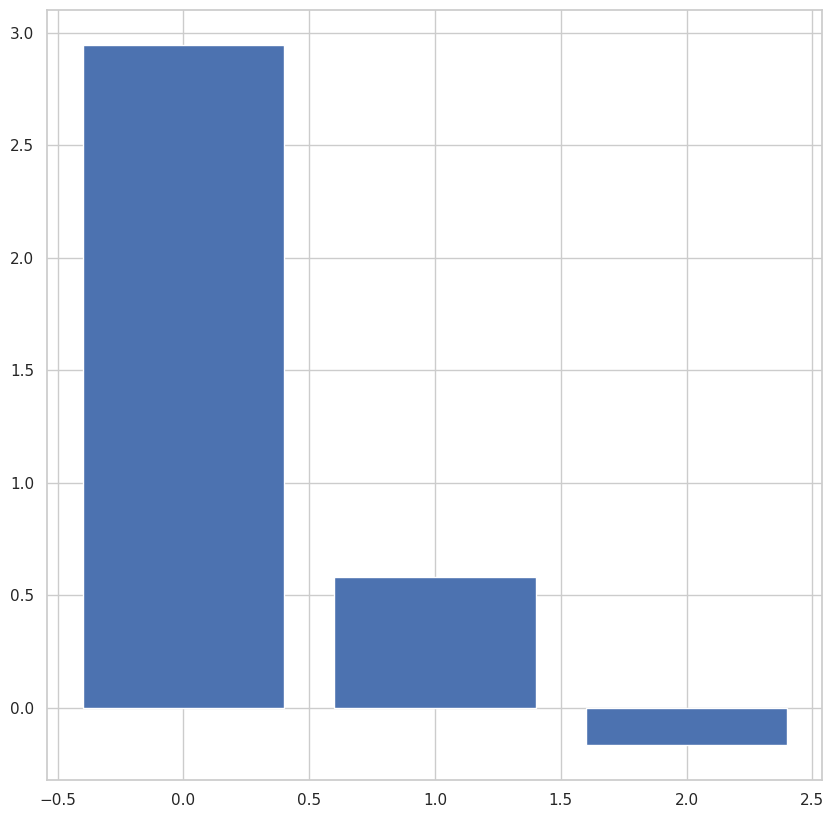

In [76]:
importance = lr.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Decision Tree

In [77]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [79]:
from sklearn.tree import DecisionTreeClassifier

Feature: 0, Score: 0.82786
Feature: 1, Score: 0.15443
Feature: 2, Score: 0.01772


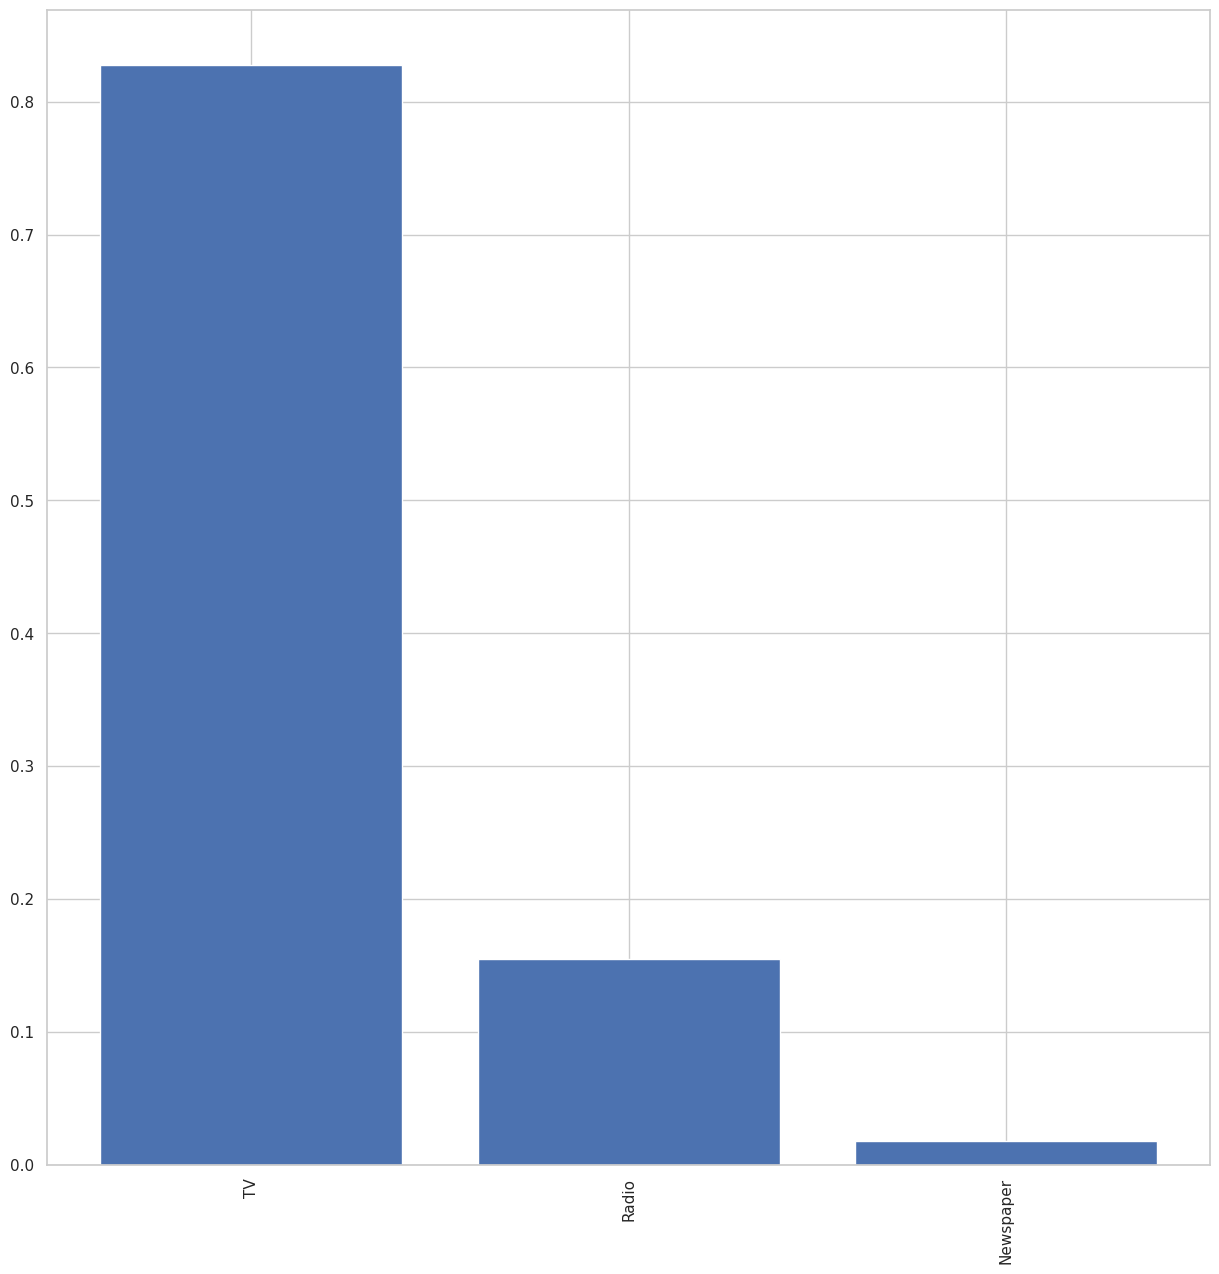

In [80]:
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

Random Forest

In [81]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [82]:
from sklearn.ensemble import RandomForestClassifier

Feature: 0, Score: 0.73021
Feature: 1, Score: 0.15502
Feature: 2, Score: 0.11477


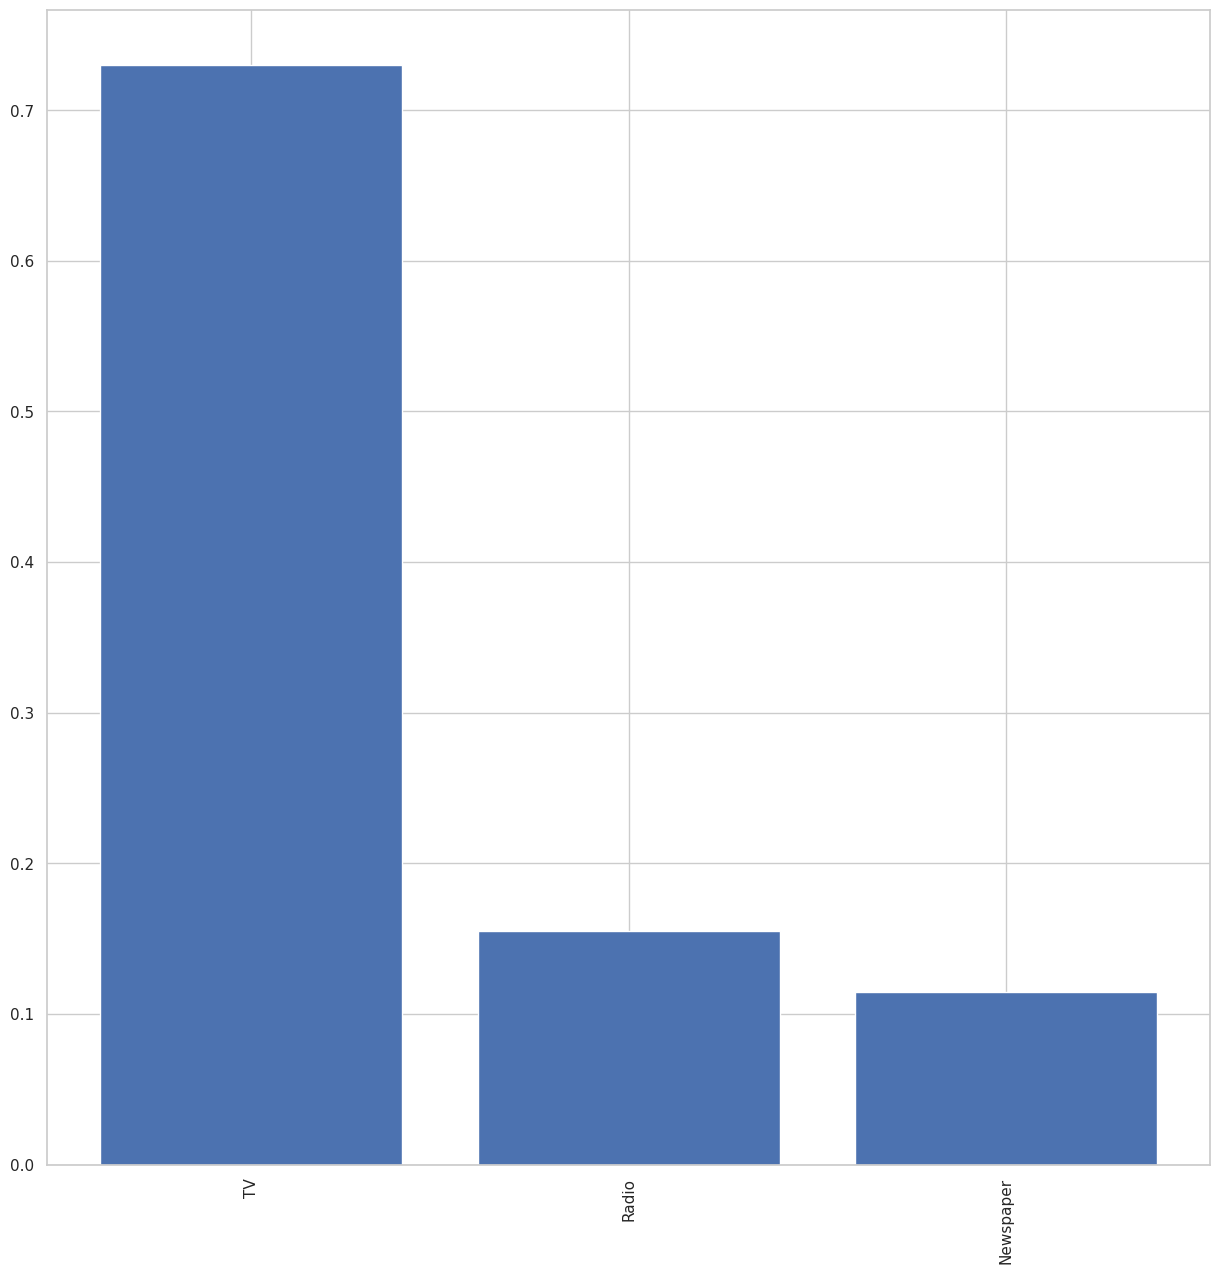

In [83]:
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

XGBoost Feature Importance

In [84]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

In [85]:
from xgboost import XGBClassifier

Feature: 0, Score: 0.86034
Feature: 1, Score: 0.10442
Feature: 2, Score: 0.03523


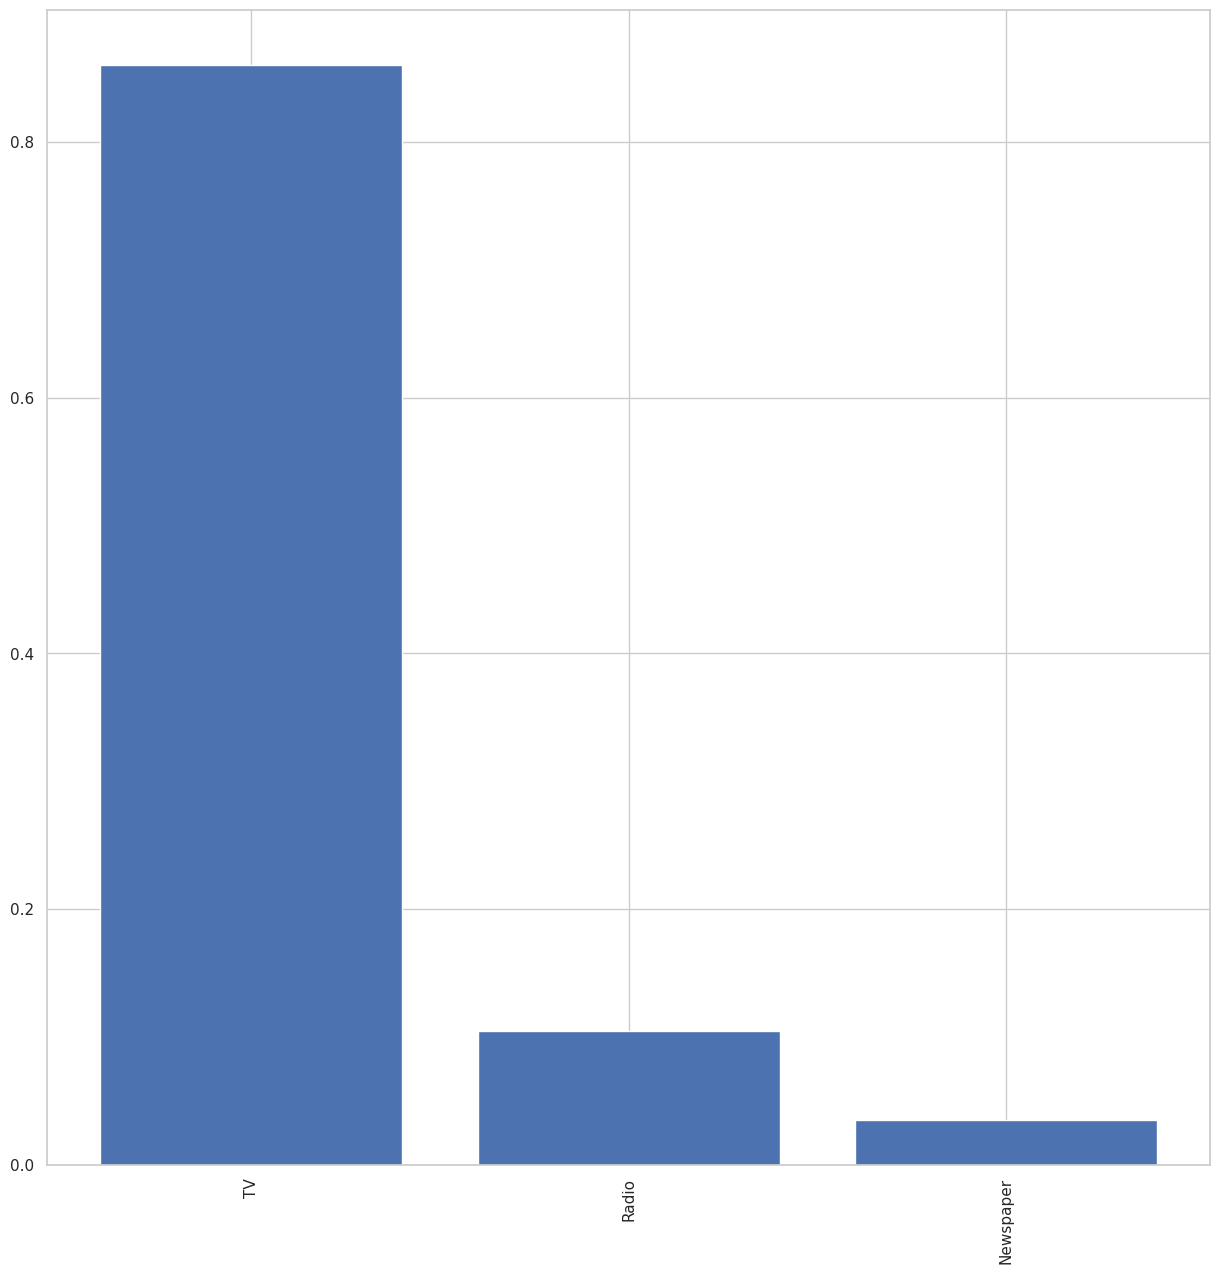

In [86]:
model = XGBClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()

Permutation Feature Importance - technique for calculating relative importance scores that is independent of the model used.

In [87]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [88]:
col=['id', 'diagnosis']
X=df.drop(col, axis=1)
y=df['diagnosis']
X_train, x_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=10)

Feature: 0, Score: 0.24900
Feature: 1, Score: 0.03100
Feature: 2, Score: 0.00700


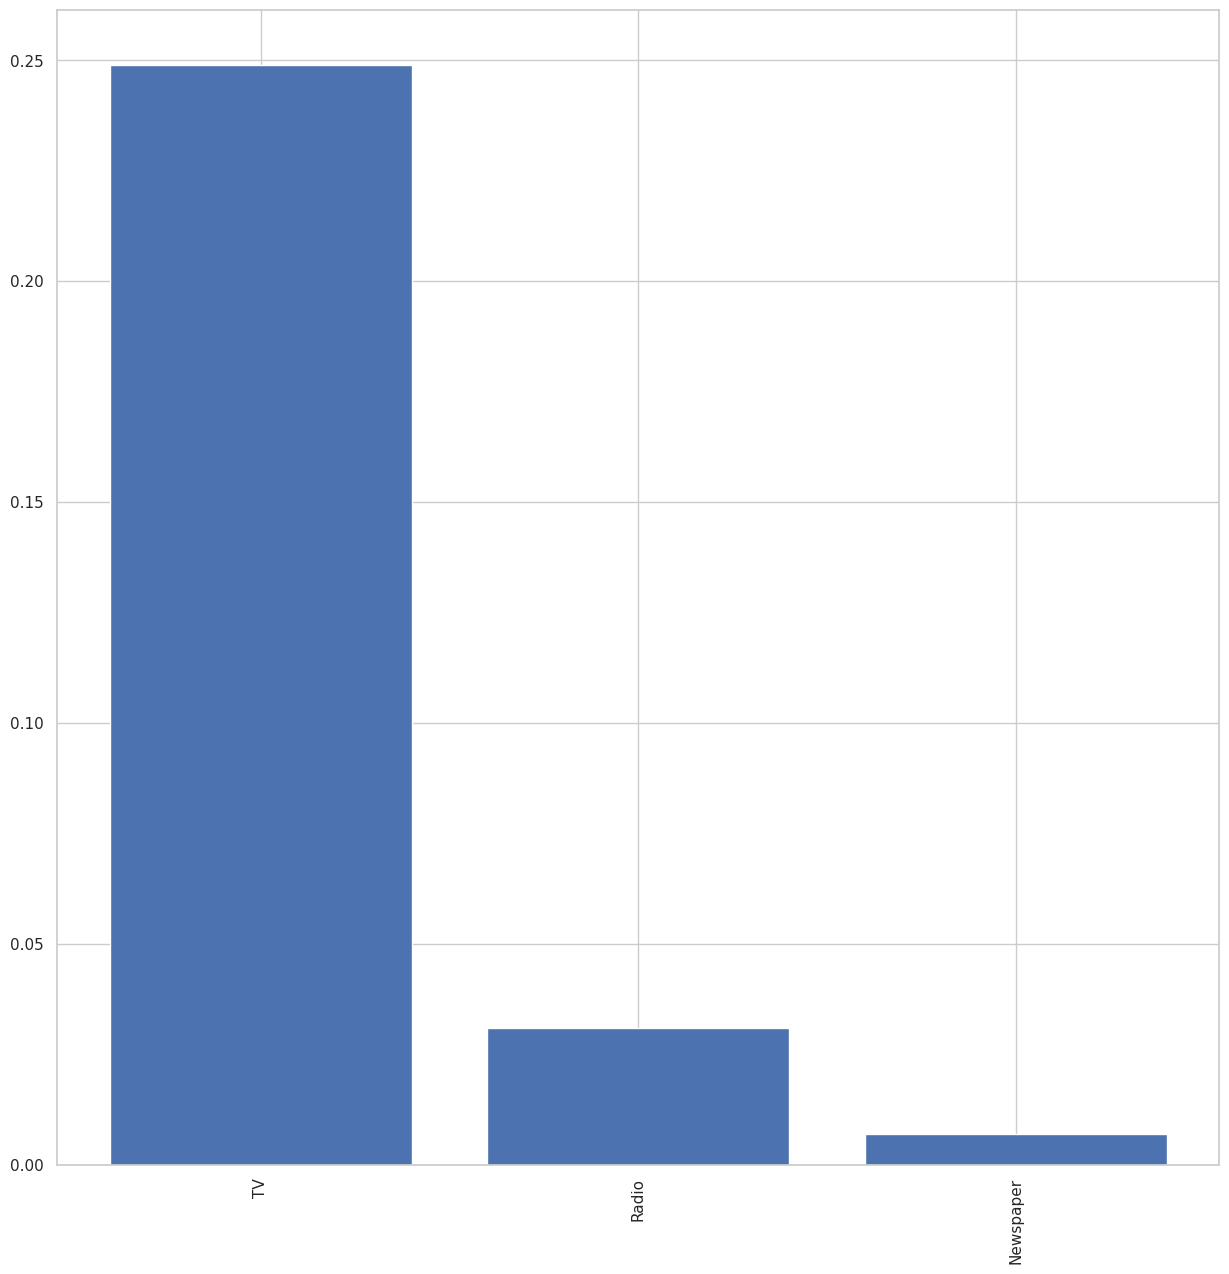

In [89]:
model = KNeighborsClassifier()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
for i,v in enumerate(importance):
    print('Feature: %d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,15))
plt.bar(X.columns, importance)
plt.xticks(rotation=90)

plt.show()
